# Hole Area in Gel  (H.I.G.)
Designed by Hao Wang $$ $$
Version 1.1 --last update 2023-Feb-10$$ $$
Email harrywang11@126.com for any problem

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
import cv2
from skimage import transform, morphology, filters

(1024, 1024)
43.0


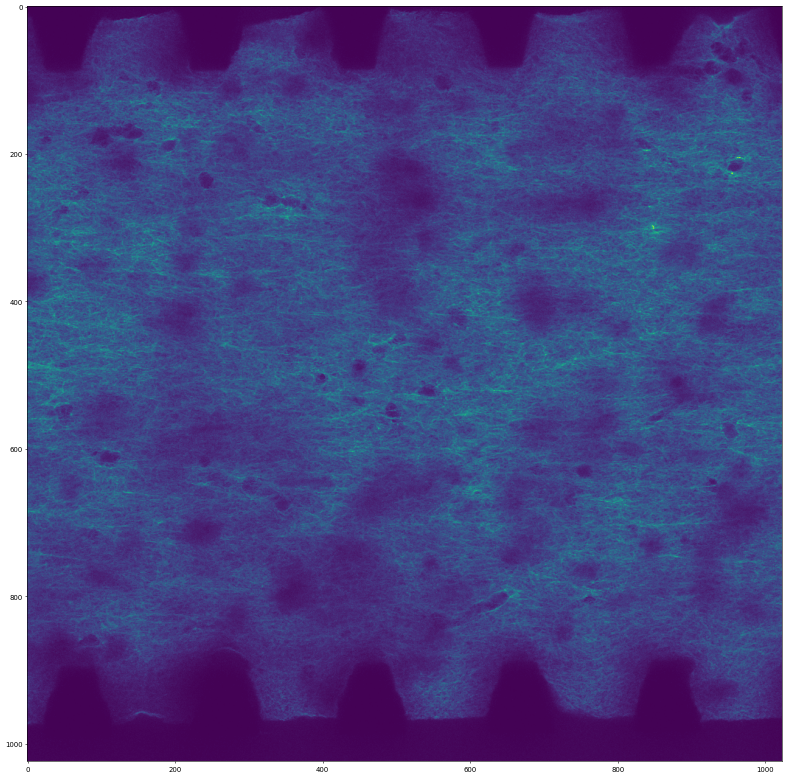

In [89]:
img = io.imread('pressure3.tif')    # change file name here
x=img[:,:]
# normalize the imahe
scale = np.amax(x)
y = x/scale
y=y*256
int_x1 = y. astype(int)
# show image
fig = plt.figure(figsize=(20, 20), dpi=50)
print(int_x1.shape)
plt.imshow(int_x1)
print(np.percentile(int_x1, 20))

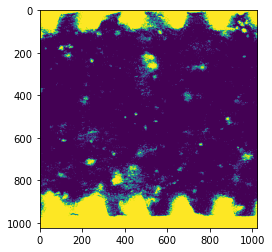

In [96]:
cur = np.array(int_x1)
# thresholding
cur[cur<45]=300
cur[cur<299]=0
cur[cur>1]=1
plt.imshow(cur)

In [97]:
# get area
ls = np.count_nonzero(cur)
ls

223656

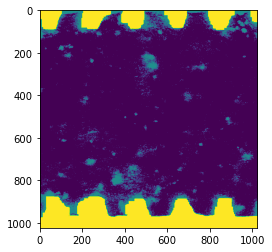

In [98]:
# remove holes
kernel = np.ones((40, 40), np.uint8)
cur = cur.astype('uint8')
opening = cv2.morphologyEx(cur, cv2.MORPH_OPEN, kernel)
#cleaned = morphology.remove_small_objects(cur, min_size=200000, connectivity=1)
p1 = opening+cur
plt.imshow(p1)

In [99]:
# get area
ls1 = np.count_nonzero(opening)
ls1

143661

In [100]:
# percentage of removed holes
(ls-ls1)/(1024*1024)

0.07628917694091797

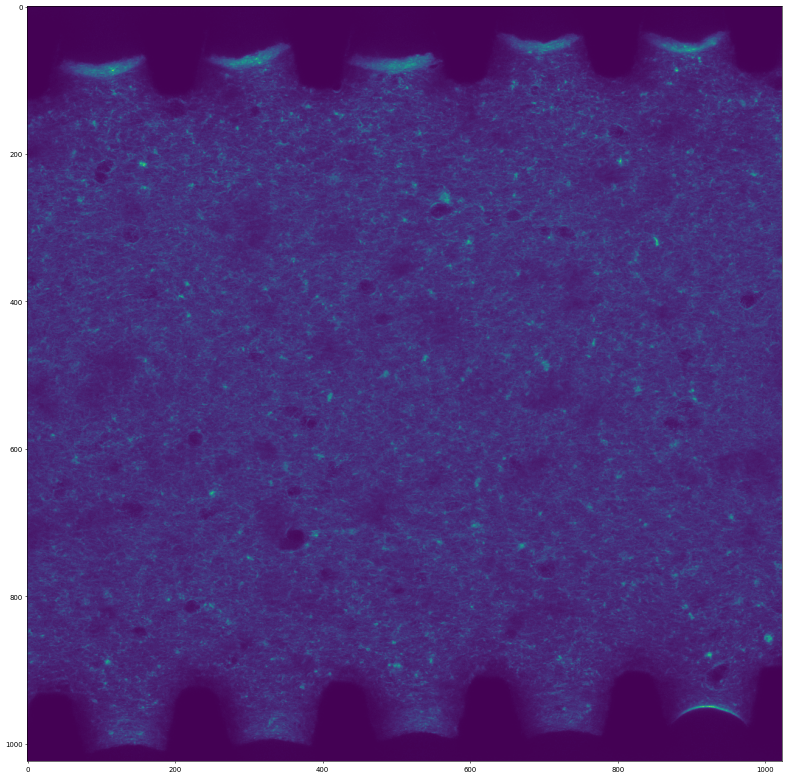

In [118]:
# repeat for different img
img2 = io.imread('flow.tif')    # change file name here
x=img2
scale = np.amax(x)
y = x/scale
y=y*256
int_x2 = y. astype(int)
# show image
fig = plt.figure(figsize=(20, 20), dpi=50)
plt.imshow(int_x2)

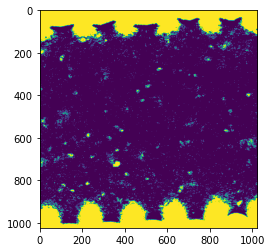

In [104]:
cur2 = np.array(int_x)
cur2[cur2<30]=300
cur2[cur2<299]=0
cur2[cur2>1]=1
plt.imshow(cur2)

In [105]:
ls = np.count_nonzero(cur2)
ls

206469

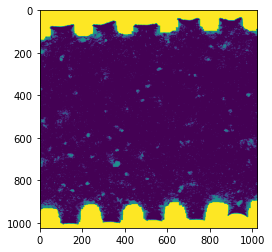

In [106]:
kernel = np.ones((30, 30), np.uint8)
cur2 = cur2.astype('uint8')
opening = cv2.morphologyEx(cur2, cv2.MORPH_OPEN, kernel)
#cleaned = morphology.remove_small_objects(cur, min_size=200000, connectivity=1)
p2 = opening+cur2
plt.imshow(p2)

In [107]:
ls2 = np.count_nonzero(opening)
ls2

158218

In [108]:
ls-ls2

48251

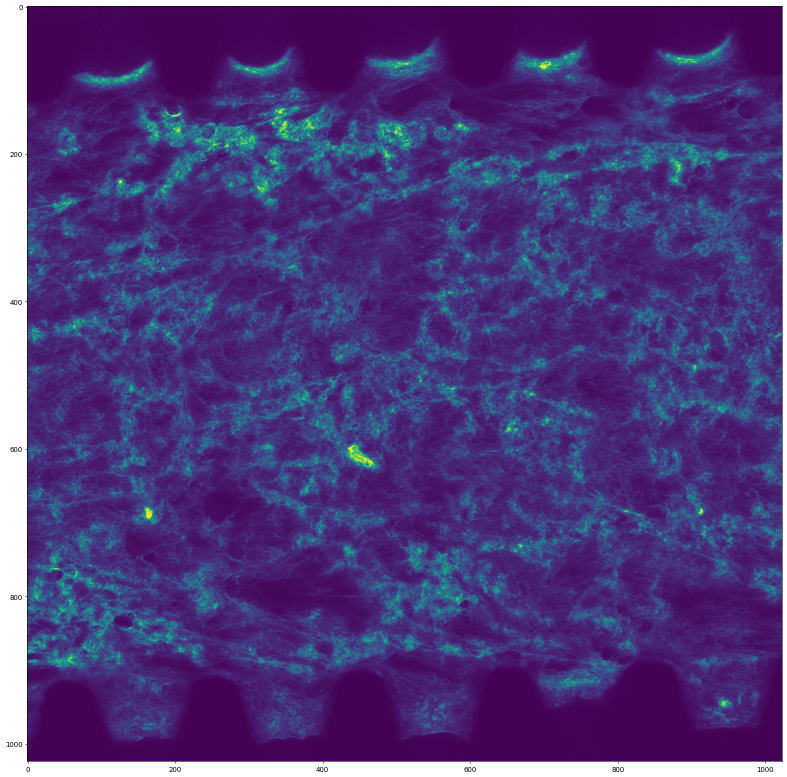

In [119]:
img3 = io.imread('pressure.tif')    # change file name here
x=img3
scale = np.amax(x)
y = x/scale
y=y*256
int_x3 = y. astype(int)
# show image
fig = plt.figure(figsize=(20, 20), dpi=50)
plt.imshow(int_x3)

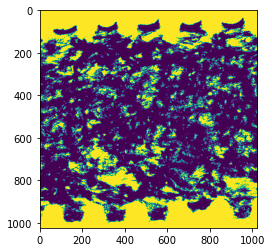

In [110]:
cur3 = np.array(int_x)
cur3[cur3<30]=300
cur3[cur3<299]=0
cur3[cur3>1]=1
plt.imshow(cur3)

In [111]:
ls = np.count_nonzero(cur3)
ls

388799

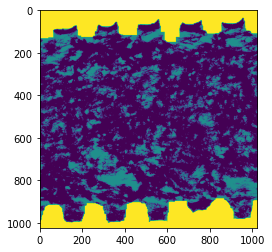

In [112]:
kernel = np.ones((45, 40), np.uint8)
cur3 = cur3.astype('uint8')
opening = cv2.morphologyEx(cur3, cv2.MORPH_OPEN, kernel)
#cleaned = morphology.remove_small_objects(cur, min_size=200000, connectivity=1)
p3= cur3+opening
plt.imshow(p3)

In [92]:
ls3 = np.count_nonzero(opening)
ls3

180648

In [93]:
ls-ls3

208151

In [94]:
np.shape(cur2)

(1024, 1024)

(-0.5, 1023.5, 1023.5, -0.5)

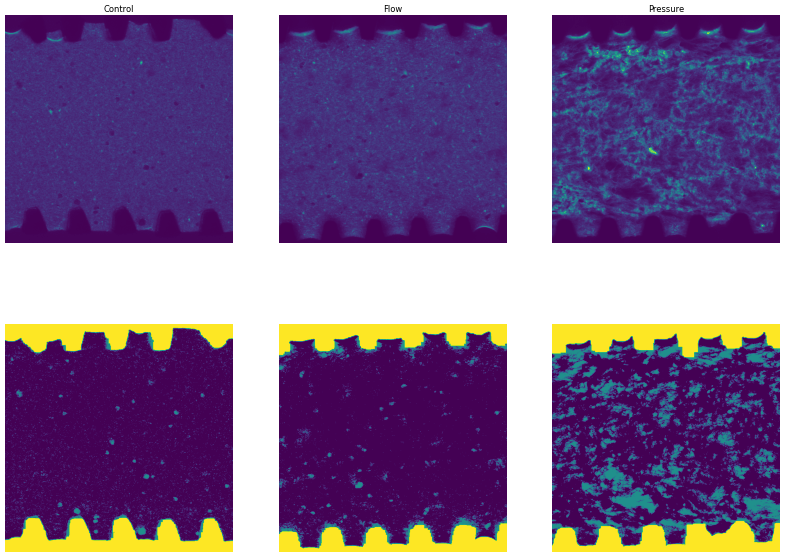

In [132]:
# plotting
fig, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(2, 3, figsize=(20, 15), dpi=50)

ax1.imshow(int_x1)
ax1.axis('off')
ax1.set_title('Control')
ax2.imshow(int_x2)
ax2.axis('off')
ax2.set_title('Flow')
ax3.imshow(int_x3)
ax3.axis('off')
ax3.set_title('Pressure')
ax4.imshow(p1)
ax4.axis('off')
ax5.imshow(p2)
ax5.axis('off')
ax6.imshow(p3)
ax6.axis('off')